In [1]:
%load_ext autoreload
%autoreload 2

## import general packages
import numpy as np
from matplotlib import pyplot as plt, gridspec as gs
import ipywidgets as widgets
#%matplotlib nbagg


import os, sys

## add root directory to path, to allow for imports 
root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
if not root_dir in sys.path: sys.path.append(root_dir)


## import darkMatter specific packages
from darkMatter import darkMatter
from general_utils.plots import *
from general_utils.parameters import create_population_values, set_options, get_J, get_var_V

from empirical.model import *

In [2]:
## setting simulation parameters
steps = 100
save = False
file_format = "png"
rerun = False
compile = False

# tau_I = [0.005,0.02,0.06]
# tau_I = [0.005]

DM suffix: 
eps [0.0, 0.7071067811865476] <class 'list'>
eta [0.6] <class 'list'>
sim_prim [0, -1, 0] <class 'list'>
sim_sec [0, -1, 0] <class 'list'>
DM suffix: 
eps [0.0, 0.7071067811865476] <class 'list'>
eta [0.9, 0.6, 0.2] <class 'list'>
sim_prim [0, -1, 0] <class 'list'>
sim_sec [0, -1, 0] <class 'list'>
0.9
0.6
0.2
DM suffix: 
eps [0, 0.7071067811865476] <class 'list'>
alpha_0 [0.0, 0.06] <class 'list'>
sim_prim [-1, 0, 0] <class 'list'>
sim_sec [0, -1, 0] <class 'list'>
DM suffix: 
eta [0.0, 1.0] <class 'list'>
eps [0.7071067811865476] <class 'list'>
sim_prim [0, -1, 0] <class 'list'>
sim_sec [0, -1, 0] <class 'list'>


sh: 1: /home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/theory/sharkfins: Text file busy


FileNotFoundError: [Errno 2] No such file or directory: b'/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/data/results_mode=0_stats=1_approx=0_steps=100_iter_eta__const_L=1_P=2_eps=0.707_eta=0.9_J0_l=0_I_ext=-1_rateWnt=1_alpha_0=0.02_tau_n=0.nc'

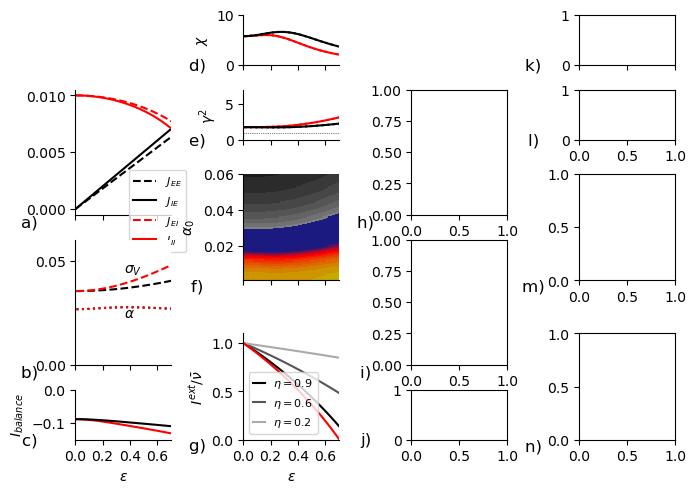

In [3]:
fig = plt.figure(figsize=(7.5, 5))

## create grids
grid_opts = {
    "bottom": 0.1,
    "top": 0.95,
    "left": 0.1,
    "right": 0.9,
    "wspace": 0.75,
    "hspace": 0.5,
}

cols = 4
gs2 = plt.GridSpec(2, cols, figure=fig, **grid_opts)
gs3 = plt.GridSpec(3, cols, figure=fig, **grid_opts)
gs4 = plt.GridSpec(4, cols, figure=fig, **grid_opts)
gs5 = plt.GridSpec(5, cols, figure=fig, **grid_opts)
gs6 = plt.GridSpec(6, cols, figure=fig, **grid_opts)

gs12 = plt.GridSpec(12, cols, figure=fig, **grid_opts)

# ax_param_space_same1 = fig.add_subplot(gs2x4[0,0])
# ax_param_space_same2 = fig.add_subplot(gs2x4[1,0])
# ax_param_space_same3 = fig.add_subplget_J, get_var_Vot(gs3x4[2,0])

ax_J_eps = fig.add_subplot(gs6[1:3, 0])
# ax_timeconstants = fig.add_subplot(gs6[1:3,0])
# ax_timeconstants.set_position([0.25,0.65,0.125,0.075])
# ax_timeconstants = fig.add_subplot(position=[0.2,0.2,0.2,0.05])
# ax_currents_var = fig.add_subplot(gs12[4,0])
ax_vars = fig.add_subplot(gs6[3:5, 0])
ax_currents = fig.add_subplot(gs6[5, 0])


ax_chi_eps = fig.add_subplot(gs6[0, 1])
ax_gamma_eps = fig.add_subplot(gs6[1, 1])

ax_param_space_eps = fig.add_subplot(gs3[1, 1])
ax_I_ext = fig.add_subplot(gs3[2, 1])


ax_J_eta = fig.add_subplot(gs6[1:3, 2])

ax_vars_eta = fig.add_subplot(gs6[3:5, 2])
ax_currents_eta = fig.add_subplot(gs6[5, 2])

ax_chi_eta = fig.add_subplot(gs6[0, 3])
ax_gamma_eta = fig.add_subplot(gs6[1, 3])
ax_param_space_eta1 = fig.add_subplot(gs3[1, 3])
ax_param_space_eta2 = fig.add_subplot(gs3[2, 3])


for i, ax in enumerate(
    [
        ax_J_eps,
        ax_vars,
        ax_currents,
        ax_chi_eps,
        ax_gamma_eps,
        ax_param_space_eps,
        ax_I_ext,
        ax_J_eta,
        ax_vars_eta,
        ax_currents_eta,
        ax_chi_eta,
        ax_gamma_eta,
        ax_param_space_eta1,
        ax_param_space_eta2,
    ],
    start=1,
):
    set_title(ax, order=i, offset=[-0.45, -0.1], fontsize=12)


tau_G, tau_A, tau_N = [0.03, 0.005, 0.2]
options_changes = {
    "mode_stats": 1,
    "tau_I": [tau_G, tau_A, tau_N],
    "alpha_0": 0.02,
    "tau_n": 0.0,
    "eta": 0.9,
    "eps": np.sqrt(1.0 / 2),
}


## calculate and plot solution for same timeconstants
# options = set_options(L=1,nI=1,nE=1)
# options['simulation'] = {
#     'rateWnt': [0,20],
#     'alpha_0': [0.0,0.16],
#     'sim_prim': [0,-1,0],
#     'sim_sec': [0,-1,0]
# }
# options |= {**options_changes, 'tau_I': [tau_A,tau_A,tau_N]}
# order = [o for o in list(options['simulation']) if not o.startswith('sim')]

# res = darkMatter(steps=steps,options=options,rerun=rerun,compile=compile)

# for p,ax in enumerate([ax_param_space_same1,ax_param_space_same2]):
#     pchi,pgamma = plot_fins(ax,res[order[0]],res[order[1]],
#         res['gamma'][p,...],res['chi'][p,...],res['regions'][p,...],implausible=res['implausible'][p,...])
# plt.setp(ax_param_space_same1,xlabel=get_displayString(order[0]),ylabel=get_displayString(order[1]))


# options |= {'mode_stats': 1, 'tau_I': [tau_G,tau_A,tau_N], 'tau_n': 0., 'eps': np.sqrt(1./2)}
# res = darkMatter(steps=steps,options=options,rerun=rerun,compile=compile)
# p=1
# pchi,pgamma = plot_fins(ax_param_space_same3,res[order[0]],res[order[1]],
#         res['gamma'][p,...],res['chi'][p,...],res['regions'][p,...],implausible=res['implausible'][p,...])
# plt.setp(ax_param_space_same3,xlabel=get_displayString(order[0]),ylabel=get_displayString(order[1]))


## calculate and plot solution for different timeconstants
options = set_options(L=1, nI=1, nE=1)

options["simulation"] = {
    "eps": [0.0, np.sqrt(1.0 / 2)],
    "eta": [0.6],
    "sim_prim": [0, -1, 0],
    "sim_sec": [0, -1, 0],
}
options |= options_changes
order = [o for o in list(options["simulation"]) if not o.startswith("sim")]

plt_para = {
    "x": {
        "key": order[0],
        "lim": np.sqrt(1.0 / 2),
    },
}


eta = 0.9
eps = np.linspace(0, np.sqrt(1.0 / 2), 100)

for p_pre in ["E", "I"]:
    for p_post in ["E", "I"]:
        ax_J_eps.plot(
            eps,
            get_J(eta, eps, options["tau_M"], p_pre, p_post),
            color="k" if p_pre == "E" else "r",
            linestyle="-" if p_post == "I" else "--",
            label=r"$J_{%s%s}$" % (p_post, p_pre),
        )

ax_J_eps.legend(
    prop={"size": 8}, loc="upper left", bbox_to_anchor=(0.5, 0.4), handlelength=2
)


res = darkMatter(steps=steps, options=options, rerun=rerun, compile=compile, logging=3)

J_EE = get_J(res["eta"], res["eps"], options["tau_M"], "E", "E")
J_EI = get_J(res["eta"], res["eps"], options["tau_M"], "I", "E")
J_IE = get_J(res["eta"], res["eps"], options["tau_M"], "E", "I")
J_II = get_J(res["eta"], res["eps"], options["tau_M"], "I", "I")

var_E_V_A, var_E_V_N, var_E_V_G = get_var_V(
    J_EE,
    J_EI,
    options["rateWnt"],
    tau_A,
    tau_N,
    tau_G,
    options["tau_M"],
    options["tau_n"],
)
var_I_V_A, var_I_V_N, var_I_V_G = get_var_V(
    J_IE,
    J_II,
    options["rateWnt"],
    tau_A,
    tau_N,
    tau_G,
    options["tau_M"],
    options["tau_n"],
)

### plot contributions of different synapses
# ax_timeconstants.plot(res[order[0]],np.sqrt(var_E_V_G),'r--',label=r'$\sigma_{V_E^G}$ (GABA)')
# ax_timeconstants.plot(res[order[0]],np.sqrt(var_E_V_A),'k--',label=r'$\sigma_{V_E^A}$ (AMPA)')
# if options['tau_n'] > 0:
#    ax_timeconstants.plot(res[order[0]],np.sqrt(var_E_V_N),'k--',label=r'$ \sigma_{V_E^N}$ (NMDA)')
#    ax_timeconstants.legend(prop={'size':10},bbox_to_anchor=(0.05,1.2),loc='upper left',ncol=1)
# else:
#    ax_timeconstants.text(0.2,0.005,r'$\sigma_{V_{EE}}$ (AMPA)',fontsize=10)#r'$\sigma_{V_{EE}}$ (AMPA) $\hat{=} \sigma_{V_E^A}$'
#    ax_timeconstants.text(0.1,0.038,r'$\sigma_{V_{EI}}$ (GABA)',fontsize=10)#r'$\sigma_{V_{EI}}$ (GABA) $\hat{=} \sigma_{V_E^G}$'

# plt.setp(ax_timeconstants,ylim=[0,0.05])

idx = int(steps / 2)
## plot overall quenched and temporal variances
ax_vars.plot(res[order[0]], np.sqrt(var_E_V_G + var_E_V_A), "k--")
ax_vars.plot(res[order[0]], np.sqrt(var_I_V_G + var_I_V_A), "r--")

ax_vars.text(
    res[order[0]][idx], np.sqrt(var_I_V_G + var_I_V_A)[idx] + 0.005, r"$\sigma_V$"
)

i = 0
alpha_I = J_II**2 * res["q"][0, i, :] + J_IE**2 * res["q"][1, i, :]
alpha_E = J_EI**2 * res["q"][0, i, :] + J_EE**2 * res["q"][1, i, :]

ax_vars.plot(res[order[0]], np.sqrt(alpha_E + options["alpha_0"] ** 2), "k:")
ax_vars.plot(res[order[0]], np.sqrt(alpha_I + options["alpha_0"] ** 2), "r:")

ax_vars.text(
    res[order[0]][idx],
    np.sqrt(alpha_E + options["alpha_0"] ** 2)[idx] - 0.005,
    r"$\alpha$",
    fontsize=10,
)
# plt.setp(ax_currents,yticks=np.linspace(0.,0.1,3),ylim=[0.,0.06])

## plot currents
ax_currents.plot(res[order[0]], -res["I_balance"][0, 0, :], "r", label=r"$I_I$")
ax_currents.plot(res[order[0]], -res["I_balance"][1, 0, :], "k", label=r"$I_E$")

plt.setp(ax_vars, yticks=np.linspace(0, 0.05, 2), ylim=[0, 0.06])
plt.setp(
    ax_currents,
    yticks=np.linspace(-0.1, 0.0, 2),
    ylim=[-0.15, 0.0],
    ylabel="$I_{balance}$",
)

## plot parameters
plot_chi(ax_chi_eps, res, plt_para, order=0)
plot_gamma(ax_gamma_eps, res, plt_para, order=0)


## plot I_ext vs nu
options = set_options(L=1, nI=1, nE=1)
options["simulation"] = {
    "eps": [0.0, np.sqrt(1.0 / 2)],
    "eta": [0.9, 0.6, 0.2],
    "sim_prim": [0, -1, 0],
    "sim_sec": [0, -1, 0],
}
options |= options_changes
order = [o for o in list(options["simulation"]) if not o.startswith("sim")]

res = darkMatter(steps=steps, options=options, rerun=rerun, compile=False, logging=3)

I_I_per_nu = np.sqrt(1 - res["eps"] ** 2) - res["eps"]

# eta = [0.9,0.6,0.2]
for i, eta in enumerate(res["eta"]):
    print(eta)
    I_E_per_nu = np.sqrt(1 - (eta * res["eps"]) ** 2) - eta * res["eps"]
    col = float(i) / len(res["eta"])
    ax_I_ext.plot(
        res[order[0]], I_E_per_nu, color=(col, col, col), label=r"$\eta = %3.1g$" % eta
    )

ax_I_ext.plot(res[order[0]], I_I_per_nu, "r")
ax_I_ext.legend(prop={"size": 8}, loc="lower left", handlelength=1)
ax_I_ext.set_ylabel(r"$I^{ext} / \bar{\nu}$")

plt.setp(ax_I_ext, ylim=[0, 1.1], yticks=np.linspace(0, 1, 3))


options = set_options(L=1, nI=1, nE=1)
options["simulation"] = {
    "eps": [0, np.sqrt(1.0 / 2)],
    "alpha_0": [0.0, 0.06],
    "sim_prim": [-1, 0, 0],
    "sim_sec": [0, -1, 0],
}
options |= options_changes
order = [o for o in list(options["simulation"]) if not o.startswith("sim")]

res = darkMatter(steps=steps, options=options, rerun=rerun, compile=compile)

p = 1
pchi, pgamma = plot_fins(
    ax_param_space_eps,
    res[order[0]],
    res[order[1]],
    res["gamma"][p, ...],
    res["chi"][p, ...],
    res["regions"][p, ...],
    implausible=res["implausible"][p, ...],
)
plt.setp(ax_param_space_eps, ylabel=get_displayString(order[1]))


for ax in [
    ax_J_eps,
    ax_vars,
    ax_currents,
    ax_I_ext,
    ax_chi_eps,
    ax_gamma_eps,
    ax_param_space_eps,
]:
    plt.setp(ax, xticks=np.linspace(0, 1, 6), xlim=[0, plt_para["x"]["lim"]])
    ax.spines[["top", "right"]].set_color("none")

for ax in [ax_J_eps, ax_vars, ax_gamma_eps, ax_chi_eps, ax_chi_eta, ax_param_space_eps]:
    plt.setp(ax, xticklabels=[], xlabel=None)

for ax in [ax_currents, ax_I_ext]:
    plt.setp(ax, xlabel=get_displayString("eps"))


options = set_options(L=1, nI=1, nE=1)

options["simulation"] = {
    "eta": [0.0, 1.0],
    "eps": [np.sqrt(1.0 / 2)],
    "sim_prim": [0, -1, 0],
    "sim_sec": [0, -1, 0],
}
options |= options_changes
order = [o for o in list(options["simulation"]) if not o.startswith("sim")]

res = darkMatter(steps=steps, options=options, rerun=rerun, compile=compile, logging=3)


eta = np.linspace(0, 1.0, 100)
eps = np.sqrt(1.0 / 2)
for p_pre in ["E", "I"]:
    for p_post in ["E", "I"]:
        if p_post == "I":
            ax_J_eta.plot(
                eta,
                get_J(eta, np.full(len(eta), eps), options["tau_M"], p_pre, p_post),
                color="k" if p_pre == "E" else "r",
                label=r"$J_{%s%s}$" % (p_pre, p_post),
            )
        else:
            ax_J_eta.plot(
                eta,
                get_J(eta, eps, options["tau_M"], p_pre, p_post),
                color="k" if p_pre == "E" else "r",
                linestyle="--",
                label=r"$J_{%s%s}$" % (p_pre, p_post),
            )


J_EE = get_J(res["eta"], res["eps"], options["tau_M"], "E", "E")
J_EI = get_J(
    res["eta"], np.full(len(res["eta"]), res["eps"]), options["tau_M"], "I", "E"
)
J_IE = get_J(res["eta"], res["eps"], options["tau_M"], "E", "I")
J_II = get_J(
    res["eta"], np.full(len(res["eta"]), res["eps"]), options["tau_M"], "I", "I"
)

var_E_V_A, var_E_V_N, var_E_V_G = get_var_V(
    J_EE,
    J_EI,
    options["rateWnt"],
    tau_A,
    tau_N,
    tau_G,
    options["tau_M"],
    options["tau_n"],
)
var_I_V_A, var_I_V_N, var_I_V_G = get_var_V(
    J_IE,
    J_II,
    options["rateWnt"],
    tau_A,
    tau_N,
    tau_G,
    options["tau_M"],
    options["tau_n"],
)


## plot overall quenched and temporal variances
ax_vars_eta.plot(res[order[0]], np.sqrt(var_E_V_G + var_E_V_A), "k--")
ax_vars_eta.plot(res[order[0]], np.sqrt(var_I_V_G + var_I_V_A), "r--")

i = 0
alpha_I = J_II**2 * res["q"][0, i, :] + J_IE**2 * res["q"][1, i, :]
alpha_E = J_EI**2 * res["q"][0, i, :] + J_EE**2 * res["q"][1, i, :]

ax_vars_eta.plot(res[order[0]], np.sqrt(alpha_E + options["alpha_0"] ** 2), "k:")
ax_vars_eta.plot(res[order[0]], np.sqrt(alpha_I + options["alpha_0"] ** 2), "r:")

## plot currents
ax_currents_eta.plot(res[order[0]], -res["I_balance"][0, 0, :], "r", label=r"$I_I$")
ax_currents_eta.plot(res[order[0]], -res["I_balance"][1, 0, :], "k", label=r"$I_E$")

plt.setp(ax_vars_eta, yticks=np.linspace(0.0, 0.1, 3), ylim=[0.0, 0.06])
plt.setp(ax_currents_eta, yticks=np.linspace(-0.1, 0.0, 2), ylim=[-0.15, 0.0])


plt_para = {
    "x": {
        "key": order[0],
        "lim": 1.0,
    },
}

## plot parameters
plot_chi(ax_chi_eta, res, plt_para, order=0)
plot_gamma(ax_gamma_eta, res, plt_para, order=0)

for ax in [ax_gamma_eps, ax_gamma_eta]:
    plt.setp(ax, ylim=[0, 4])


options = set_options(L=1, nI=1, nE=1)
options["simulation"] = {
    "eta": [0, 1.0],
    "alpha_0": [0.0, 0.06],
    "sim_prim": [-1, 0, 0],
    "sim_sec": [0, -1, 0],
}
options |= options_changes
order = [o for o in list(options["simulation"]) if not o.startswith("sim")]

res = darkMatter(steps=steps, options=options, rerun=rerun, compile=compile)

for p, ax in enumerate([ax_param_space_eta1, ax_param_space_eta2]):
    pchi, pgamma = plot_fins(
        ax,
        res[order[0]],
        res[order[1]],
        res["gamma"][p, ...],
        res["chi"][p, ...],
        res["regions"][p, ...],
        implausible=res["implausible"][p, ...],
    )


for ax, label in zip(
    [ax_param_space_eps, ax_param_space_eta1, ax_param_space_eta2],
    ["inh. population", "inh. population", "exc. population"],
):
    ax.text(
        0.1,
        0.9,
        label,
        fontsize=8,
        transform=ax.transAxes,
        ha="left",
        va="top",
        bbox=dict(facecolor="w", edgecolor="k", boxstyle="round"),
    )
    plt.setp(ax, ylabel=get_displayString(order[1]))


for ax in [
    ax_J_eta,
    ax_vars_eta,
    ax_currents_eta,
    ax_chi_eta,
    ax_gamma_eta,
    ax_param_space_eta1,
    ax_param_space_eta2,
]:
    plt.setp(ax, xticks=np.linspace(0, 1, 3), xlim=[0, 1])
    ax.spines[["top", "right"]].set_color("none")

for ax in [ax_J_eta, ax_vars_eta, ax_gamma_eta, ax_chi_eta, ax_param_space_eta1]:
    plt.setp(ax, xticklabels=[], xlabel=None)

# plt.setp(ax_param_space_same1,xlabel=get_displayString(order[0]),ylabel=get_displayString(order[1]))


# plt.setp(ax_param_space_same2,xlabel=get_displayString('rateWnt'))
for ax in [ax_currents_eta, ax_param_space_eta2]:
    plt.setp(ax, xlabel=get_displayString(order[0]))


plot_colorbar(
    pchi,
    pgamma,
    x=[0.92, 0.945],
    y=[ax_param_space_eta2.get_position().y0, ax_param_space_eta1.get_position().y1],
)

print("make timeconstant plot as inset to synaptic weight plot (only in eps)")
print("separate variances and current plot from one another to highlight effects")
print("make sketch if parameter impact (scale, showing impact)")


save = True
if save:
    file_format = "png"
    sv_name = f"../figures/transition_2pops.{file_format}"
    plt.savefig(sv_name)
    print('Figure saved as "%s"' % sv_name)
else:
    plt.show(block=False)

In [ ]:
steps

100